In [24]:
#Import Packages
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#Import Data and Convert to Data Frame
column_names = ['Age', 'Sex', 'CP', 'TRestBPS', 'Chol', 'FBS', 'RestECG', 'MaxHR', 'ExAng', 'OldPeak', 'Slope', 'CA', 'Thal', 'Diagnosis']
cleveland_raw = pd.read_csv('/Users/dilynzertuche/Desktop/VisualStudio/Python Projects/Data Sets/heart+disease/processed.cleveland.data', names = column_names)

#Data Wrangling
cleveland_processed = cleveland_raw.replace('?', )
cleveland_processed = cleveland_processed.replace({'Diagnosis': [2,3,4]},{'Diagnosis': 1})
cleveland_processed.dropna()


#Set Variables
X = cleveland_processed.drop('Diagnosis', axis = 1)
x = X.values
y = cleveland_processed['Diagnosis']
y = y.values

In [11]:
#Split Model Into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)

#Create Model
clf = svm.SVC(C = 1000, kernel = 'linear', degree = 3, gamma = 1)

#Find Optimal C and Gamma (WARNING: Takes Long Time / Energy)
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['linear']}
# grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)

#grid.fit(X_train, y_train)

#print(grid.best_params_)

#Produce Predictions
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Accuracy: 0.879121
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        53
           1       0.94      0.76      0.84        38

    accuracy                           0.88        91
   macro avg       0.89      0.86      0.87        91
weighted avg       0.89      0.88      0.88        91



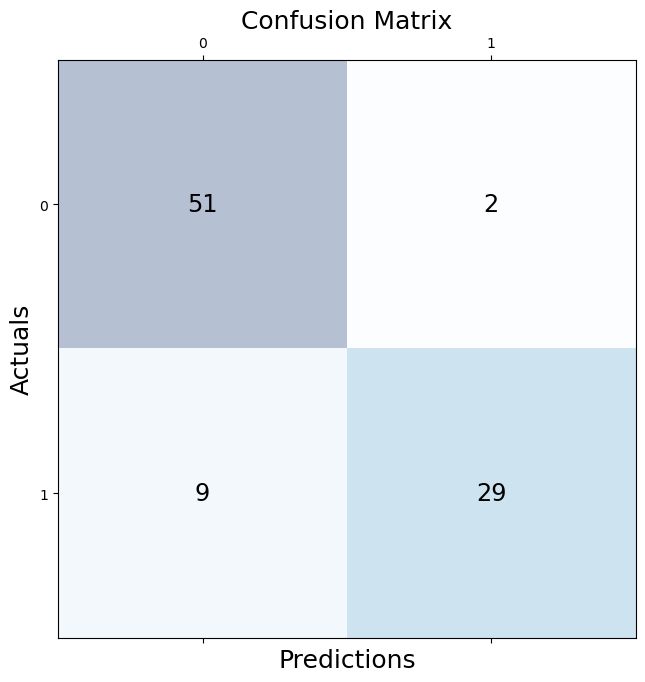

In [25]:
#Evaluate the Model
print("Accuracy: %4f" % metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred, labels = None)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()